In [132]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sn
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [98]:
df=pd.read_csv("Loan_Prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


There are 614 rows and 13 columns

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

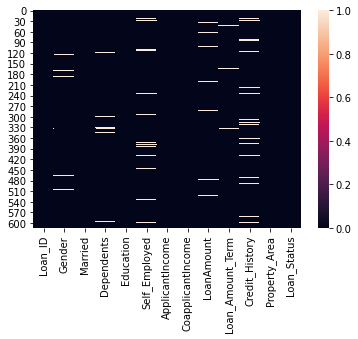

In [7]:
sn.heatmap(df.isnull())

There are some missing values

# Droping Missing Values

In [99]:
df.dropna(axis=0,inplace=True)

In [100]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [91]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization

Male      394
Female     86
Name: Gender, dtype: int64


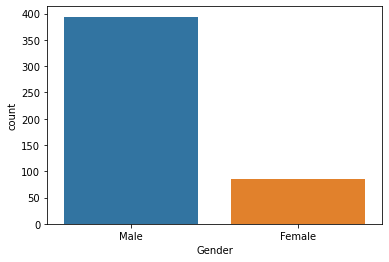

In [62]:
ax = sn.countplot(x="Gender", data=df)
print(df["Gender"].value_counts())

toatal number of male is 394 and total number of female is 86

Yes    311
No     169
Name: Married, dtype: int64


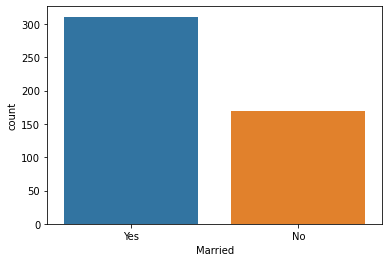

In [63]:
ax = sn.countplot(x="Married", data=df)
print(df["Married"].value_counts())

total number of married is 311 and unmarried is 169

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64


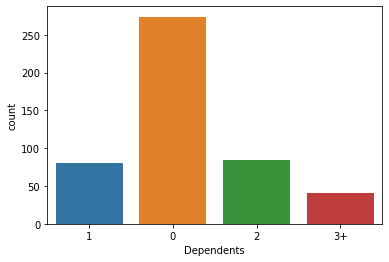

In [64]:
ax = sn.countplot(x="Dependents", data=df)
print(df["Dependents"].value_counts())

274 customer has 0 dependents, 80 customers has 1 dependents, 85 customer has 2 dependents and 41 customer has 3 or more than 3 dependents

Graduate        383
Not Graduate     97
Name: Education, dtype: int64


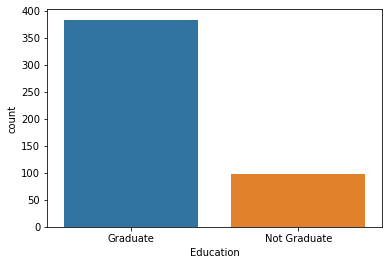

In [65]:
ax = sn.countplot(x="Education", data=df)
print(df["Education"].value_counts())

383 graduate and 97 customer are not gradute

No     414
Yes     66
Name: Self_Employed, dtype: int64


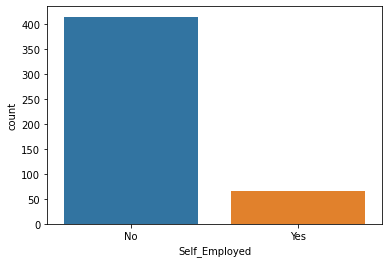

In [66]:
ax = sn.countplot(x="Self_Employed", data=df)
print(df["Self_Employed"].value_counts())

414 cutomer are doing service and 66 are self employed

{'bodies': [<matplotlib.collections.PolyCollection at 0x21138b10310>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x21138b10df0>,
 'cmins': <matplotlib.collections.LineCollection at 0x211389f5fa0>,
 'cbars': <matplotlib.collections.LineCollection at 0x211389f58b0>}

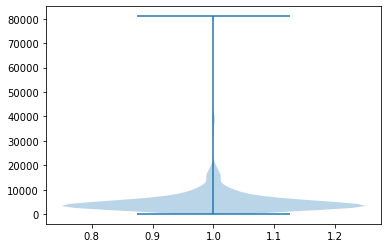

In [67]:
plt.violinplot(df['ApplicantIncome'])

most of the customers income lies between 2000 to 5000

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

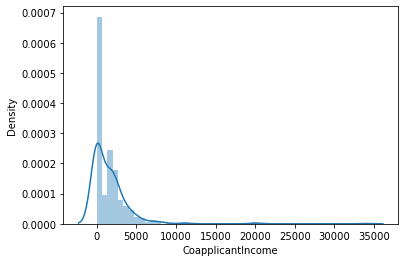

In [68]:
sn.distplot(df['CoapplicantIncome'], kde=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

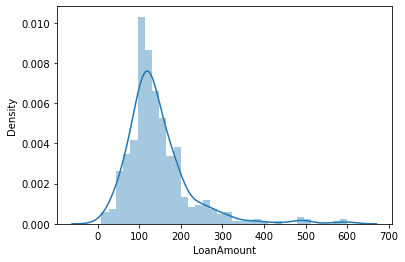

In [69]:
sn.distplot(df['LoanAmount'], kde=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

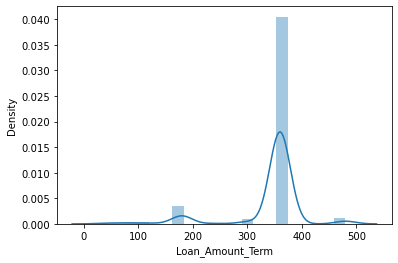

In [70]:
sn.distplot(df['Loan_Amount_Term'], kde=True)

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

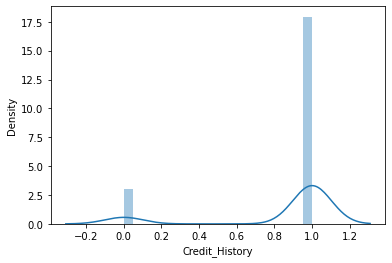

In [71]:
sn.distplot(df['Credit_History'], kde=True)

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64


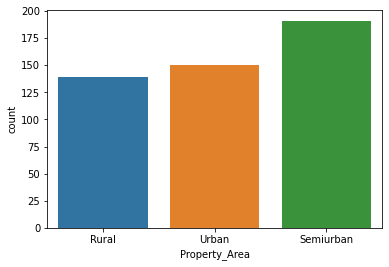

In [72]:
ax = sn.countplot(x="Property_Area", data=df)
print(df["Property_Area"].value_counts())

Semiurban customers are 191 urban customers are 150 and rural customers are 139

Y    332
N    148
Name: Loan_Status, dtype: int64


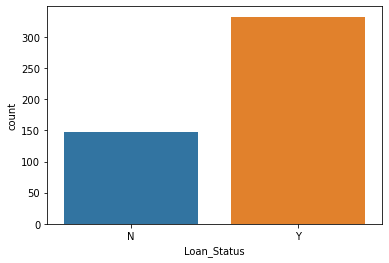

In [73]:
ax = sn.countplot(x="Loan_Status", data=df)
print(df["Loan_Status"].value_counts())

Loan given to 332 cutomers and not given to 148 customers

# Encoding dataframe

In [101]:

lb=LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])
df['Married']=lb.fit_transform(df['Married'])
df['Dependents']=lb.fit_transform(df['Dependents'])
df['Education']=lb.fit_transform(df['Education'])
df['Property_Area']=lb.fit_transform(df['Property_Area'])
df['Self_Employed']=lb.fit_transform(df['Self_Employed'])
df['Loan_Status']=lb.fit_transform(df['Loan_Status'])

In [102]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [103]:
df.drop(["Loan_ID"],axis=1,inplace=True)

In [104]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Outlier checking

<AxesSubplot:>

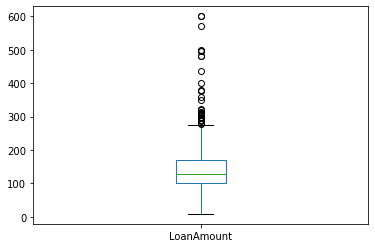

In [78]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

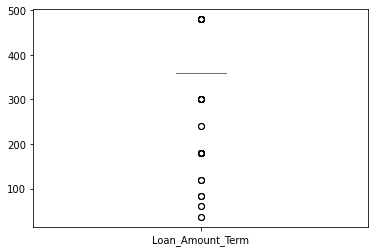

In [79]:
df['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

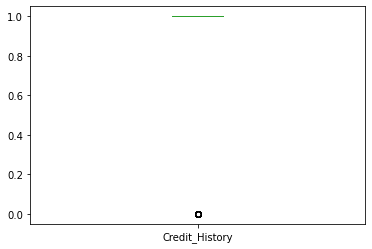

In [80]:
df['Credit_History'].plot.box()

In [105]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  8,  12,  54,  75,  98, 120, 120, 137, 137, 142, 144, 187, 205,
        220, 244, 286, 312, 319, 326, 347, 380, 386, 409, 410, 426, 438,
        450, 454, 457, 471], dtype=int64),
 array([6, 8, 8, 8, 8, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 7, 6, 5, 6, 5, 7, 8,
        7, 7, 8, 7, 8, 6, 8, 7], dtype=int64))

In [106]:
df=df[(z<3).all(axis=1)]
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [107]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,0.818584,0.643805,0.756637,0.207965,0.130531,4763.199115,1403.710000,136.672566,347.522124,0.851770,1.022124,0.699115
std,0.385789,0.479404,1.015654,0.406301,0.337260,3010.857752,1666.991571,58.883355,53.639694,0.355722,0.781974,0.459151
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,180.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2880.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3848.000000,1211.500000,127.500000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5712.500000,2236.500000,164.250000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,18165.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

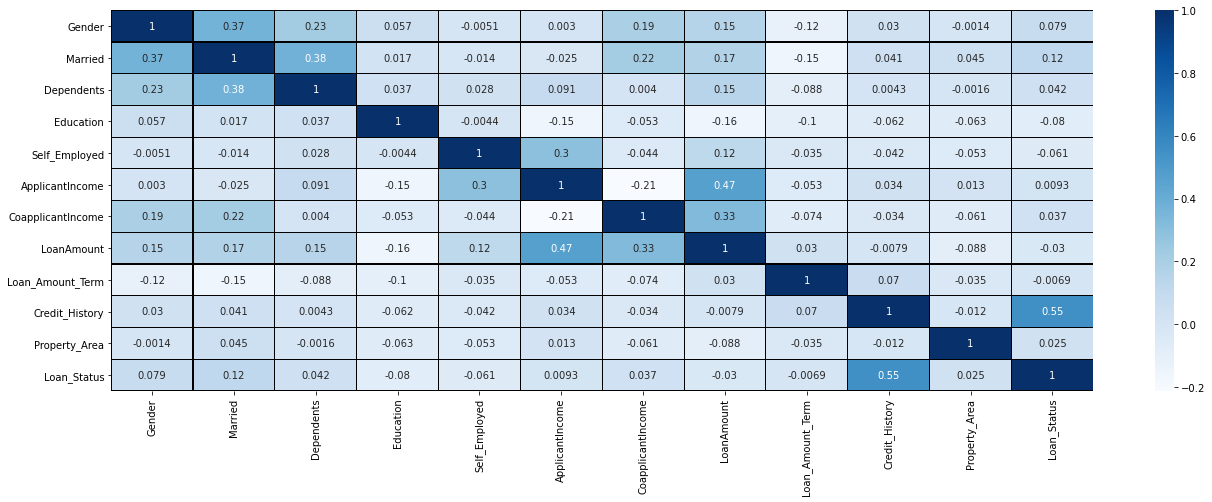

In [109]:
plt.figure(figsize=(22,7))
sn.heatmap(df.corr(),cmap='Blues',linewidths=0.1,linecolor="black",annot=True)

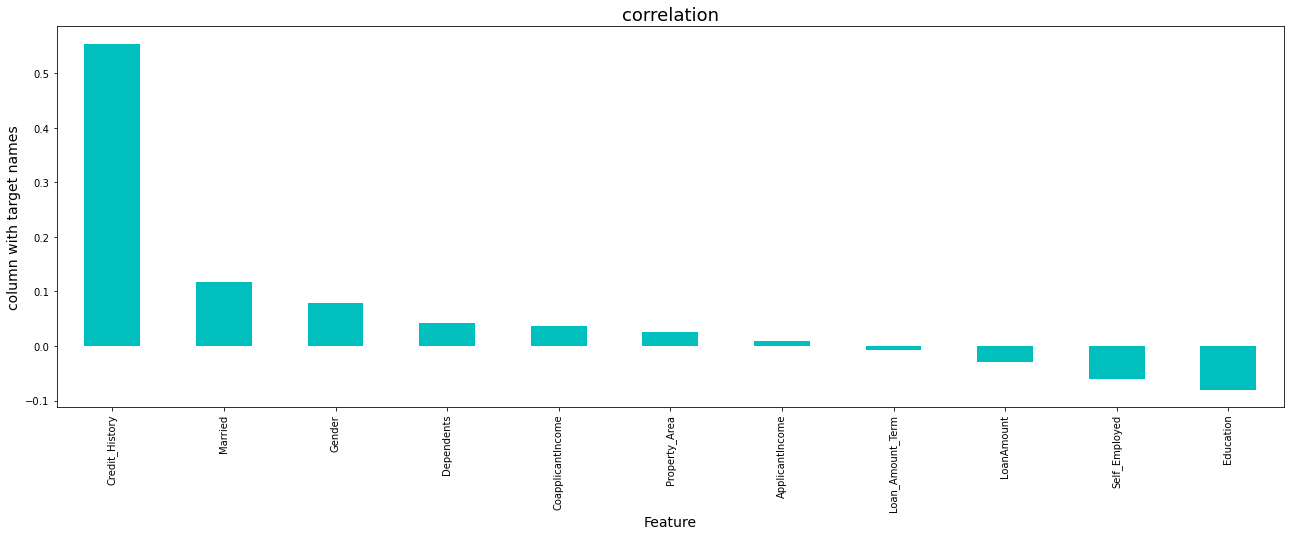

In [110]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Loan Status is highly corelated to credit history

In [111]:
x=df.iloc[:,:-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


In [112]:
y=df.iloc[:,-1]
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

In [113]:
from imblearn.over_sampling import SMOTE

In [114]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [115]:
x.value_counts()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
0       0        0           0          0              645              3683.000000        113.000000  480.0             1.0             0                1
1       1        0           1          0              1668             3890.000000        201.000000  360.0             0.0             1                1
                             0          1              2479             3013.000000        188.000000  360.0             1.0             2                1
                                                       2577             3750.000000        152.000000  360.0             1.0             0                1
                                                       3000             0.000000           66.000000   360.0             1.0             2                1
                                                                     

In [116]:
x.value_counts()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
0       0        0           0          0              645              3683.000000        113.000000  480.0             1.0             0                1
1       1        0           1          0              1668             3890.000000        201.000000  360.0             0.0             1                1
                             0          1              2479             3013.000000        188.000000  360.0             1.0             2                1
                                                       2577             3750.000000        152.000000  360.0             1.0             0                1
                                                       3000             0.000000           66.000000   360.0             1.0             2                1
                                                                     

In [122]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.57247803,  0.90916973,  0.33575115, ...,  0.2578611 ,
         0.59057561, -1.18442504],
       [ 0.57247803,  0.90916973, -0.71994401, ...,  0.2578611 ,
         0.59057561,  1.3879345 ],
       [ 0.57247803,  0.90916973, -0.71994401, ...,  0.2578611 ,
         0.59057561,  1.3879345 ],
       ...,
       [ 0.57247803, -1.09990464, -0.71994401, ...,  0.2578611 ,
         0.23312893, -1.18442504],
       [ 0.57247803, -1.09990464, -0.71994401, ...,  0.2578611 ,
        -1.31212023, -1.18442504],
       [ 0.57247803,  0.90916973, -0.71994401, ...,  0.01543234,
         0.05763445,  0.10175473]])

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [124]:
lg=LogisticRegression()

In [125]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.7920792079207921
At random state 0,the testing accuracy is:- 0.7637795275590551


At random state 1,the training accuracy is:- 0.7960396039603961
At random state 1,the testing accuracy is:- 0.8031496062992126


At random state 2,the training accuracy is:- 0.803960396039604
At random state 2,the testing accuracy is:- 0.7952755905511811


At random state 3,the training accuracy is:- 0.8
At random state 3,the testing accuracy is:- 0.84251968503937


At random state 4,the training accuracy is:- 0.7782178217821782
At random state 4,the testing accuracy is:- 0.889763779527559


At random state 5,the training accuracy is:- 0.801980198019802
At random state 5,the testing accuracy is:- 0.7716535433070866


At random state 6,the training accuracy is:- 0.7980198019801981
At random state 6,the testing accuracy is:- 0.8031496062992126


At random state 7,the training accuracy is:- 0.7940594059405941
At random state 7,the testing accuracy is:- 0.8110236

At random state 63,the testing accuracy is:- 0.7637795275590551


At random state 64,the training accuracy is:- 0.807920792079208
At random state 64,the testing accuracy is:- 0.7244094488188977


At random state 65,the training accuracy is:- 0.8118811881188119
At random state 65,the testing accuracy is:- 0.7716535433070866


At random state 66,the training accuracy is:- 0.7900990099009901
At random state 66,the testing accuracy is:- 0.8031496062992126


At random state 67,the training accuracy is:- 0.7920792079207921
At random state 67,the testing accuracy is:- 0.7874015748031497


At random state 68,the training accuracy is:- 0.8
At random state 68,the testing accuracy is:- 0.8188976377952756


At random state 69,the training accuracy is:- 0.8118811881188119
At random state 69,the testing accuracy is:- 0.8031496062992126


At random state 70,the training accuracy is:- 0.7920792079207921
At random state 70,the testing accuracy is:- 0.8267716535433071


At random state 71,the training a

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=53)

In [127]:
x_train.shape

(423, 11)

In [128]:
y_train.shape

(423,)

In [129]:
x_test.shape

(209, 11)

In [130]:
y_test.shape

(209,)

In [133]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7942583732057417
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       104
           1       0.78      0.83      0.80       105

    accuracy                           0.79       209
   macro avg       0.80      0.79      0.79       209
weighted avg       0.80      0.79      0.79       209



In [134]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7751196172248804
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       104
           1       0.82      0.71      0.76       105

    accuracy                           0.78       209
   macro avg       0.78      0.78      0.77       209
weighted avg       0.78      0.78      0.77       209



In [135]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.84688995215311
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       104
           1       0.82      0.89      0.85       105

    accuracy                           0.85       209
   macro avg       0.85      0.85      0.85       209
weighted avg       0.85      0.85      0.85       209



In [136]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7751196172248804
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       104
           1       0.74      0.85      0.79       105

    accuracy                           0.78       209
   macro avg       0.78      0.77      0.77       209
weighted avg       0.78      0.78      0.77       209



In [137]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7416267942583732
              precision    recall  f1-score   support

           0       0.81      0.62      0.71       104
           1       0.70      0.86      0.77       105

    accuracy                           0.74       209
   macro avg       0.76      0.74      0.74       209
weighted avg       0.75      0.74      0.74       209



# Cross Validation

In [138]:
from sklearn.model_selection import cross_val_score

In [139]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.7913135858017747


In [140]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7912135983002124


In [141]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.8134233220847393


In [142]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.7722659667541557


In [143]:
print(cross_val_score(kn,x,y,cv=5).mean())

0.7405074365704287


# AUC ROC Curve

In [144]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [145]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.08, 0.04, 0.68, 0.41, 0.05, 0.74, 0.6 , 0.17, 0.73, 0.8 , 0.72,
       0.76, 0.11, 0.06, 0.54, 0.08, 0.76, 0.77, 0.02, 0.  , 0.71, 0.02,
       0.24, 0.88, 0.68, 0.99, 0.97, 0.2 , 0.34, 0.74, 0.08, 0.82, 0.06,
       0.59, 0.63, 0.35, 0.01, 0.76, 0.09, 0.92, 0.23, 0.09, 0.32, 0.72,
       0.53, 0.06, 0.96, 0.69, 0.1 , 0.49, 0.59, 0.18, 0.92, 0.79, 0.6 ,
       0.44, 0.19, 0.62, 0.24, 0.83, 0.13, 0.08, 0.71, 0.12, 0.89, 0.03,
       0.19, 0.96, 0.99, 0.85, 0.83, 0.93, 0.88, 0.22, 0.33, 0.23, 0.96,
       0.68, 0.66, 0.07, 0.12, 0.61, 0.02, 0.89, 0.06, 0.67, 0.14, 0.88,
       0.05, 0.05, 0.05, 0.89, 0.64, 0.71, 0.83, 0.62, 0.06, 0.06, 0.53,
       0.46, 0.38, 0.75, 0.71, 0.14, 0.62, 0.93, 0.9 , 0.62, 0.05, 0.04,
       0.63, 0.66, 0.56, 0.08, 0.76, 0.02, 0.27, 0.82, 0.81, 0.86, 0.13,
       0.87, 0.44, 0.02, 0.75, 0.08, 0.01, 0.8 , 0.68, 0.65, 0.8 , 0.94,
       0.62, 0.75, 0.03, 0.01, 0.12, 0.57, 0.95, 0.82, 0.06, 0.47, 0.8 ,
       0.85, 0.57, 0.31, 0.63, 0.33, 0.24, 0.  , 0.

In [146]:
y_pred_prob.shape

(209,)

In [147]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [148]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00961538, 0.00961538, 0.00961538, 0.00961538,
       0.00961538, 0.00961538, 0.00961538, 0.00961538, 0.00961538,
       0.00961538, 0.01923077, 0.02884615, 0.02884615, 0.02884615,
       0.03846154, 0.03846154, 0.04807692, 0.04807692, 0.05769231,
       0.06730769, 0.08653846, 0.10576923, 0.10576923, 0.10576923,
       0.11538462, 0.125     , 0.14423077, 0.14423077, 0.14423077,
       0.15384615, 0.15384615, 0.15384615, 0.16346154, 0.16346154,
       0.17307692, 0.19230769, 0.19230769, 0.20192308, 0.20192308,
       0.20192308, 0.20192308, 0.22115385, 0.24038462, 0.26923077,
       0.29807692, 0.30769231, 0.31730769, 0.33653846, 0.36538462,
       0.375     , 0.39423077, 0.43269231, 0.46153846, 0.47115385,
       0.54807692, 0.61538462, 0.625     , 0.72115385, 0.78846154,
       0.81730769, 0.875     , 0.94230769, 1.        ])

In [149]:
tpr

array([0.        , 0.03809524, 0.04761905, 0.07619048, 0.0952381 ,
       0.1047619 , 0.11428571, 0.13333333, 0.14285714, 0.17142857,
       0.20952381, 0.22857143, 0.24761905, 0.25714286, 0.32380952,
       0.35238095, 0.37142857, 0.40952381, 0.44761905, 0.45714286,
       0.4952381 , 0.53333333, 0.55238095, 0.57142857, 0.6       ,
       0.63809524, 0.63809524, 0.66666667, 0.67619048, 0.6952381 ,
       0.7047619 , 0.7047619 , 0.72380952, 0.78095238, 0.79047619,
       0.8       , 0.82857143, 0.83809524, 0.84761905, 0.85714286,
       0.85714286, 0.87619048, 0.9047619 , 0.91428571, 0.92380952,
       0.94285714, 0.96190476, 0.96190476, 0.96190476, 0.96190476,
       0.97142857, 0.98095238, 0.98095238, 0.98095238, 0.98095238,
       0.99047619, 0.99047619, 0.99047619, 0.99047619, 0.99047619,
       0.99047619, 0.99047619, 0.99047619, 0.99047619, 0.99047619,
       1.        , 1.        , 1.        , 1.        ])

In [150]:
thresholds

array([1.99, 0.99, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.9 , 0.89, 0.88,
       0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.78, 0.77, 0.76, 0.75,
       0.74, 0.73, 0.72, 0.71, 0.69, 0.68, 0.67, 0.66, 0.65, 0.64, 0.63,
       0.62, 0.61, 0.6 , 0.59, 0.58, 0.57, 0.56, 0.54, 0.53, 0.48, 0.47,
       0.46, 0.44, 0.38, 0.34, 0.33, 0.27, 0.24, 0.23, 0.22, 0.2 , 0.19,
       0.18, 0.16, 0.13, 0.12, 0.11, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04,
       0.03, 0.02, 0.  ])

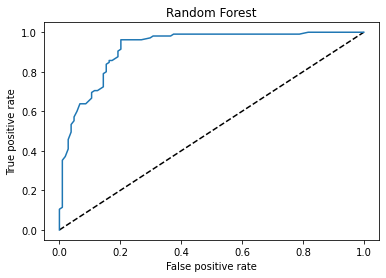

In [151]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest')
plt.show()

In [152]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [153]:
auc_score

0.8467032967032967

# Hyper Parameter Tuning

In [156]:
parameter = {'n_estimators':[100,200, 400, 600, 800, 1000],'max_depth': [10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [3, 4, 5,6],'max_features':['auto', 'sqrt']}

In [ ]:
from sklearn.model_selection import GridSearchCV
GV=GridSearchCV(rf,parameter,cv=5)

In [ ]:
GV.fit(x_train,y_train)

In [ ]:
GV.best_params_

In [155]:
rf=RandomForestClassifier(n_estimators=600,max_depth=30,criterion='gini',min_samples_split=10,min_samples_leaf=5,max_features='auto')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8277511961722488
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       104
           1       0.79      0.90      0.84       105

    accuracy                           0.83       209
   macro avg       0.84      0.83      0.83       209
weighted avg       0.84      0.83      0.83       209



# Saving Model

In [157]:
import pickle
filename = 'Loan_Prediction.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [158]:
loaded_model = pickle.load(open('Loan_Prediction.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8277511961722488
